In [2]:
import pandas as pd
from dask.array.stats import KurtosistestResult

In [3]:
df = pd.read_csv(r"C:\Users\Aliou\Downloads\income.csv")

In [7]:
print(df.describe())

              1800         1801         1802         1803         1804  \
count   195.000000   195.000000   195.000000   195.000000   195.000000   
mean   1072.179487  1071.353846  1074.210256  1073.753846  1075.430769   
std     605.373041   602.816015   614.245612   608.330435   617.123397   
min     224.000000   224.000000   224.000000   224.000000   225.000000   
25%     680.500000   680.500000   680.500000   680.500000   680.500000   
50%     959.000000   959.000000   959.000000   959.000000   954.000000   
75%    1240.000000  1240.000000  1240.000000  1245.000000  1250.000000   
max    4860.000000  4780.000000  5040.000000  4930.000000  5170.000000   

              1805         1806         1807         1808         1809  ...  \
count   195.000000   195.000000   195.000000   195.000000   195.000000  ...   
mean   1075.174359  1076.169231  1076.251282  1066.497436  1067.553846  ...   
std     610.442792   612.281097   606.053716   564.608763   569.926448  ...   
min     225.00000

In [23]:
df.min()  # valeurs minimales de chaque colonne
df.max()  # valeurs maximales de chaque colonne

country    Zimbabwe
1800           4860
1801           4780
1802           5040
1803           4930
             ...   
2046           9900
2047           9930
2048           9980
2049          98.3k
2050           9900
Length: 252, dtype: object

In [24]:
df.info


<bound method DataFrame.info of                   country  1800  1801  1802  1803  1804  1805  1806  1807  \
0             Afghanistan   683   683   683   683   683   683   683   683   
1                  Angola   700   702   705   709   711   714   718   721   
2                 Albania   755   755   755   755   755   756   756   756   
3                 Andorra  1360  1360  1360  1360  1370  1370  1370  1370   
4    United Arab Emirates  1130  1130  1140  1140  1150  1150  1160  1160   
..                    ...   ...   ...   ...   ...   ...   ...   ...   ...   
190                 Samoa  1590  1590  1590  1590  1590  1590  1590  1590   
191                 Yemen   993   995   998  1000  1000  1010  1010  1010   
192          South Africa  1780  1760  1740  1720  1700  1610  1610  1750   
193                Zambia   751   753   755   756   758   760   762   764   
194              Zimbabwe   984   985   986   987   988   989   991   992   

     1808  ...   2041   2042   2043   2044 

In [8]:
df.isnull().sum()


country    0
1800       0
1801       0
1802       0
1803       0
          ..
2046       0
2047       0
2048       0
2049       0
2050       0
Length: 252, dtype: int64

In [4]:
# Convertir les variables catégorielles
df['country'] = df['country'].astype('category')

# Fonction pour convertir les valeurs avec "k" en numérique
def convert_k(value):
    if isinstance(value, str) and 'k' in value.lower():
        return float(value.lower().replace('k','')) * 1000
    else:
        return pd.to_numeric(value, errors='coerce')

# Identifier toutes les colonnes années
annees = [col for col in df.columns if col.isdigit()]

# Appliquer la conversion colonne par colonne (sans warning)
for col in annees:
    df[col] = df[col].map(convert_k)

In [14]:
print(df.dtypes)

country    category
1800          int64
1801          int64
1802          int64
1803          int64
             ...   
2046        float64
2047        float64
2048        float64
2049        float64
2050        float64
Length: 252, dtype: object


In [5]:
df_long = df.melt(id_vars='country', var_name='année', value_name='income')
df_long['année'] = df_long['année'].astype(int)

In [16]:
print(df_long["année"])

0        1800
1        1800
2        1800
3        1800
4        1800
         ... 
48940    2050
48941    2050
48942    2050
48943    2050
48944    2050
Name: année, Length: 48945, dtype: int64


In [7]:
print(df_long.isnull())

       country  année  income
0        False  False   False
1        False  False   False
2        False  False   False
3        False  False   False
4        False  False   False
...        ...    ...     ...
48940    False  False   False
48941    False  False   False
48942    False  False   False
48943    False  False   False
48944    False  False   False

[48945 rows x 3 columns]


In [141]:
print(df_long.shape)

(48945, 3)


In [17]:
df_long.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48945 entries, 0 to 48944
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   country  48945 non-null  category
 1   année    48945 non-null  int64   
 2   income   48945 non-null  float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 866.1 KB


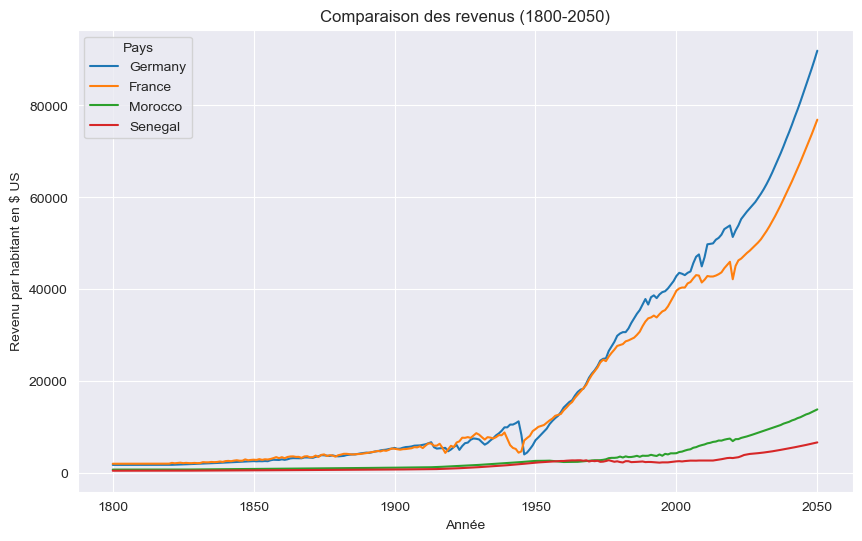

In [6]:
# Evolution du revenu dans un échantillon de pays

pays = ["France", "Germany", "Senegal", "Morocco"]

subset = df_long[df_long["country"].isin(pays)]

# Pivot : index = année, colonnes = pays, valeurs = income
pivot = subset.pivot(index="année", columns="country", values="income")

# Tracer la courbe
# Représentation graphique
import matplotlib.pyplot as plt
pivot.plot(figsize=(10,6))
plt.title("Comparaison des revenus (1800-2050)")
plt.xlabel("Année")
plt.ylabel("Revenu par habitant en $ US")
plt.legend(title="Pays")
plt.show()


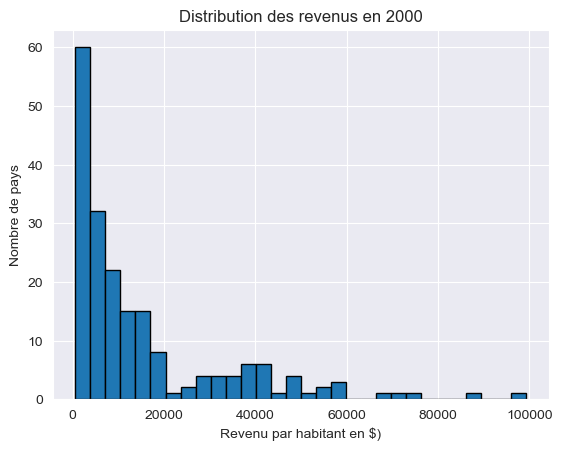

In [14]:
# pour l'année 2000
df_long[df_long["année"] == 2000]["income"].hist(bins=30, edgecolor="black")
plt.title("Distribution des revenus en 2000")
plt.xlabel("Revenu par habitant en $)")
plt.ylabel("Nombre de pays")
plt.show()


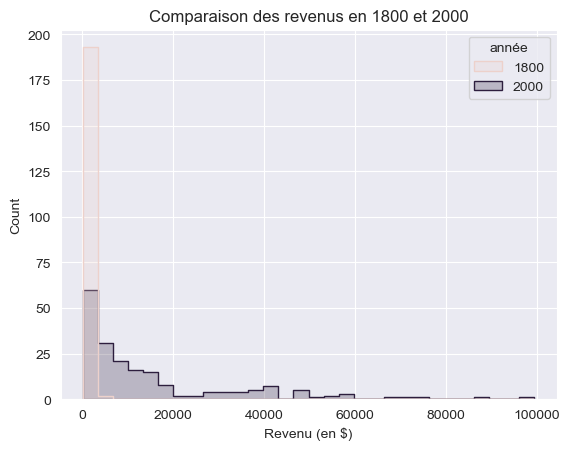

In [11]:
# On compare 1800 et 2000
import seaborn as sns

subset = df_long[df_long["année"].isin([1800, 2000])]
sns.histplot(data=subset, x="income", hue="année", element="step", bins=30)
plt.title("Comparaison des revenus en 1800 et 2000")
plt.xlabel("Revenu (en $)")
plt.show()


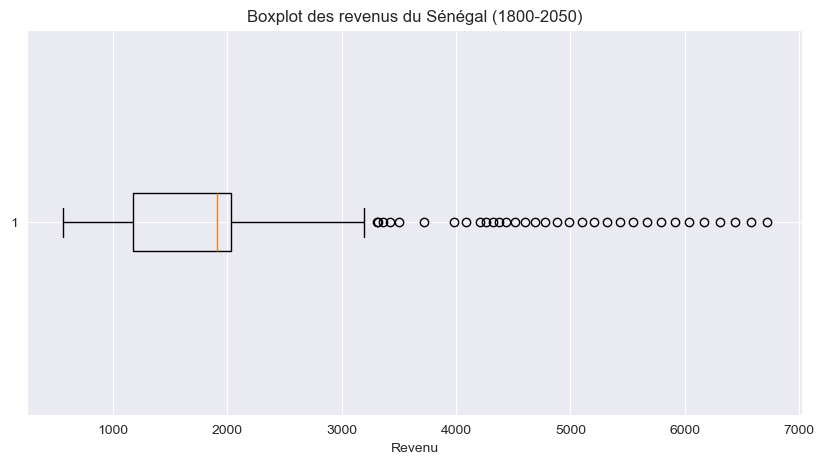

In [7]:

df_senegal = df_long[df_long["country"] == "Senegal"].drop(columns="country")

plt.figure(figsize=(10,5))
plt.boxplot(df_senegal.values.flatten(), vert=False)
plt.title("Boxplot des revenus du Sénégal (1800-2050)")
plt.xlabel("Revenu")
plt.show()

In [169]:
plt.savefig("Boxplot des revenus du Sénégal (1800-2050).png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [170]:
import os
print(os.getcwd())  # affiche le dossier courant

C:\Users\Aliou\Bureau\1_Data Analyst_cours\Stat\Stat_proba


In [8]:
import scipy.stats as stats

# Exemple sur l'année 2000
data_2000 = df_long[df_long["année"] == 2000]["income"]

print("Moyenne :", data_2000.mean())
print("Écart-type :", data_2000.std())
print("Skewness :", stats.skew(data_2000))
print("Kurtosis :", stats.kurtosis(data_2000))
print("Médiane :", data_2000.median())

Moyenne : 15201.589743589744
Écart-type : 18065.129981068058
Skewness : 1.897393704995618
Kurtosis : 3.6862916506140637
Médiane : 8050.0


In [9]:
data_2022 = df_long[df_long["année"] == 2022]["income"]
print('Moyenne :', data_2022.mean())
print("Médiane:", data_2022.std())

Moyenne : 21009.420512820514
Médiane: 22374.432863804544


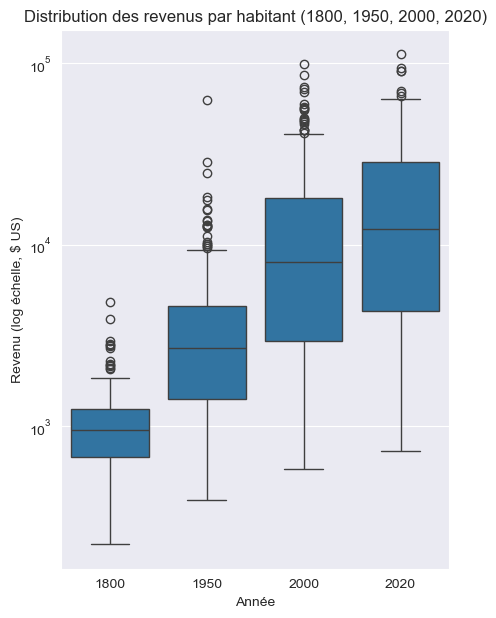

In [18]:
# Distribution des revenus par habitant
import numpy as np

# Choix des années
annees = [1800, 1950, 2000, 2020]

# Sous échantillon
subset = df_long[df_long["année"].isin(annees)]

# Boxplot
plt.figure(figsize=(5,7))
sns.boxplot(x="année", y="income", data=subset)
plt.yscale("log")  # échelle log pour mieux voir les écarts
plt.title("Distribution des revenus par habitant (1800, 1950, 2000, 2020)")
plt.xlabel("Année")
plt.ylabel("Revenu (log échelle, $ US)")
plt.show()


In [19]:
# 10 pays les plus riches en 2022
top10_2022 = df_long[df_long["année"] == 2022].sort_values("income", ascending=False).head(10)
print(top10_2022)

                    country  année    income
43394            Luxembourg   2022  119000.0
43442             Singapore   2022  113000.0
43369               Ireland   2022  107000.0
43435                 Qatar   2022   95500.0
43320           Switzerland   2022   71700.0
43397                Monaco   2022   71600.0
43419                Norway   2022   67900.0
43315                Brunei   2022   65500.0
43474         United States   2022   65300.0
43294  United Arab Emirates   2022   65200.0


In [191]:
# Le pays le plus souvent “n°1” (le plus riche chaque année)
plus_riche = df_long.loc[df_long.groupby("année")["income"].idxmax()]
print(plus_riche["country"].value_counts().head(3))


country
United Kingdom    67
Luxembourg        35
Brunei            32
Name: count, dtype: int64


In [197]:
# Pays le plus riche sur les récentes années
plus_riche_recent = df_long[df_long["année"] >= 1950].loc[df_long[df_long["année"] >= 1950].groupby("année")["income"].idxmax()]
print(plus_riche_recent["country"].value_counts())


country
Luxembourg    35
Qatar         29
Brunei        25
Kuwait         6
Singapore      6
              ..
Venezuela      0
Vietnam        0
Yemen          0
Zambia         0
Zimbabwe       0
Name: count, Length: 195, dtype: int64


In [202]:
# Le pays le plus souvent “dernier” (le plus pauvre chaque année)
plus_pauvre = df_long.loc[df_long.groupby("année")["income"].idxmin()]
print(plus_pauvre["country"].value_counts().head(10))

country
North Korea                 78
Mozambique                  61
Burundi                     42
Romania                     36
Lesotho                     11
Malawi                      10
Congo, Dem. Rep.             4
Liberia                      3
Afghanistan                  3
Central African Republic     2
Name: count, dtype: int64


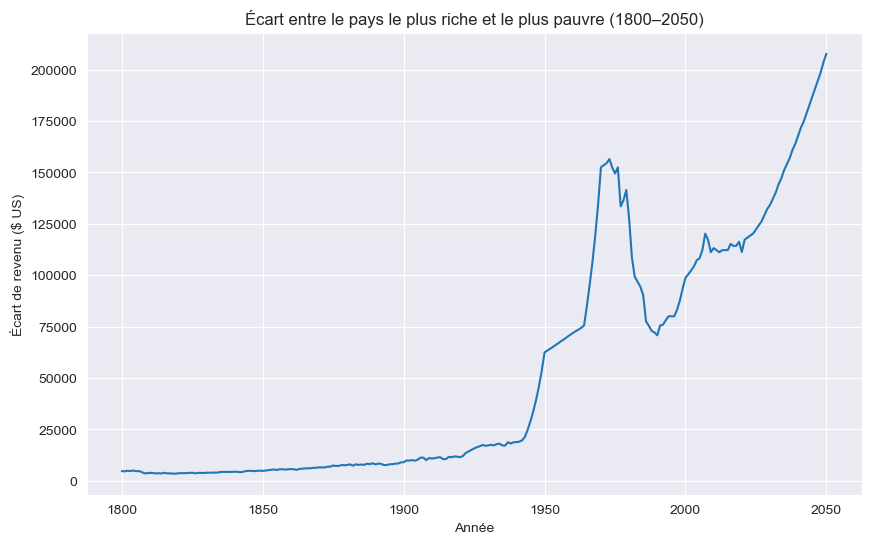

In [20]:
# Écart entre le revenu max et min au cours du temps
gap = df_long.groupby("année")["income"].agg(["min", "max"])
gap["gap"] = gap["max"] - gap["min"]

gap["gap"].plot(figsize=(10,6))
plt.title("Écart entre le pays le plus riche et le plus pauvre (1800–2050)")
plt.xlabel("Année")
plt.ylabel("Écart de revenu ($ US)")
plt.show()



In [21]:
# Tableau récapitulatif entre le pays le plus riche et celui le plus pauvre sur une période donnée
subset = df_long[(df_long["année"] >= 1980) & (df_long["année"] <= 2000)]

# Créer le tableau
rich_poor_table = subset.groupby("année").apply(
    lambda x: pd.Series({
        "Pays_plus_riche": x.loc[x["income"].idxmax(), "country"],
        "Revenu_max": x["income"].max(),
        "Pays_plus_pauvre": x.loc[x["income"].idxmin(), "country"],
        "Revenu_min": x["income"].min()
    })
).reset_index()

print(rich_poor_table)

    année Pays_plus_riche  Revenu_max Pays_plus_pauvre  Revenu_min
0    1980          Brunei    128000.0       Mozambique       551.0
1    1981           Qatar    109000.0       Mozambique       545.0
2    1982          Brunei     99700.0       Mozambique       512.0
3    1983          Brunei     97200.0       Mozambique       436.0
4    1984          Brunei     94800.0       Mozambique       443.0
5    1985          Brunei     90600.0       Mozambique       400.0
6    1986          Brunei     77900.0       Mozambique       405.0
7    1987          Brunei     75800.0       Mozambique       425.0
8    1988          Brunei     73300.0       Mozambique       446.0
9    1989          Brunei     72600.0       Mozambique       473.0
10   1990          Brunei     71200.0       Mozambique       471.0
11   1991      Luxembourg     76000.0       Mozambique       482.0
12   1992      Luxembourg     76300.0       Mozambique       437.0
13   1993      Luxembourg     78500.0       Mozambique       4

C:\Users\Aliou\AppData\Local\Temp\ipykernel_5992\2275006619.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rich_poor_table = subset.groupby("année").apply(


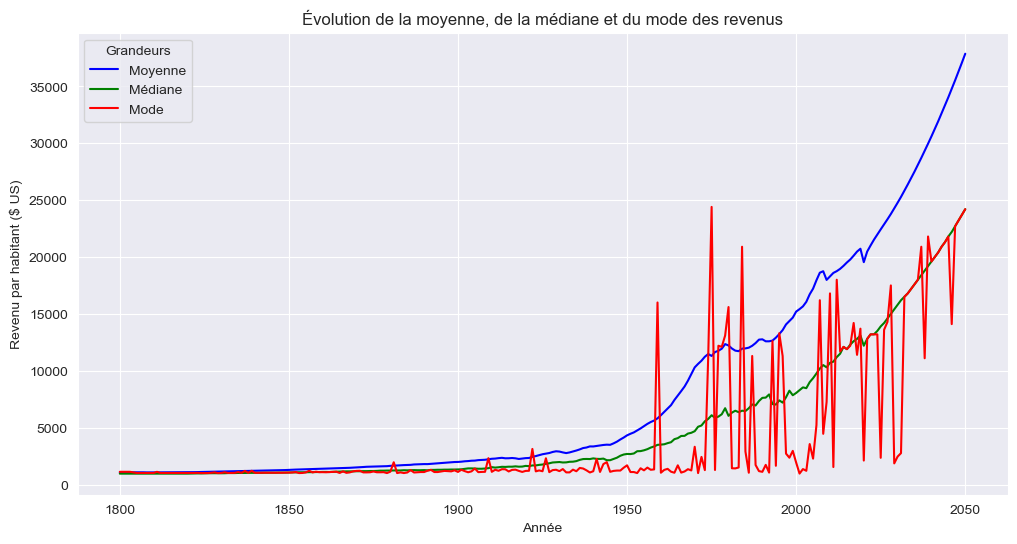

In [22]:
# Evolution de la moyenne, la médiane et du mode dans le temps
from scipy.stats import mode

# Calcul des indicateurs par année
moyenne = df_long.groupby("année")["income"].mean()
mediane = df_long.groupby("année")["income"].median()

# Pour le mode, il faut utiliser scipy.stats.mode (librairie importée ci-avant)
mode_par_annee = df_long.groupby("année")["income"].apply(lambda x: mode(x, keepdims=True).mode[0])

# Assemblage dans un DataFrame
stats = pd.DataFrame({
    "Moyenne": moyenne,
    "Médiane": mediane,
    "Mode": mode_par_annee
})

# Tracer les courbes
plt.figure(figsize=(12,6))
plt.plot(stats.index, stats["Moyenne"], label="Moyenne", color="blue")
plt.plot(stats.index, stats["Médiane"], label="Médiane", color="green")
plt.plot(stats.index, stats["Mode"], label="Mode", color="red")

plt.title("Évolution de la moyenne, de la médiane et du mode des revenus")
plt.xlabel("Année")
plt.ylabel("Revenu par habitant ($ US)")
plt.legend(title="Grandeurs")
plt.grid(True)
plt.show()

In [ ]:
# Etude de la correlation des revenus des pays

In [40]:
print(df_long.iloc[:3])

       country  année  income
0  Afghanistan   1800   683.0
1       Angola   1800   700.0
2      Albania   1800   755.0


In [23]:
# construction de notre échantillon
echantillon_pays = ["United States", "China", "Morocco", "Senegal", "Cote d'Ivoire"]
df_echantillon = df_long[df_long["country"].isin(echantillon_pays)]
# Il faut faire pivoter les données pour avoir les pays en colonnes (le format accepté par pandas)
df_echantillon_transformé = df_echantillon.pivot(index="année", columns="country", values="income")
# Générer la matrice de corrélation
corr_pays = df_echantillon_transformé.corr()
print(corr_pays)

country           China  Cote d'Ivoire   Morocco   Senegal  United States
country                                                                  
China          1.000000       0.943783  0.945900  0.868143       0.894158
Cote d'Ivoire  0.943783       1.000000  0.971667  0.966870       0.954741
Morocco        0.945900       0.971667  1.000000  0.960395       0.987516
Senegal        0.868143       0.966870  0.960395  1.000000       0.961777
United States  0.894158       0.954741  0.987516  0.961777       1.000000


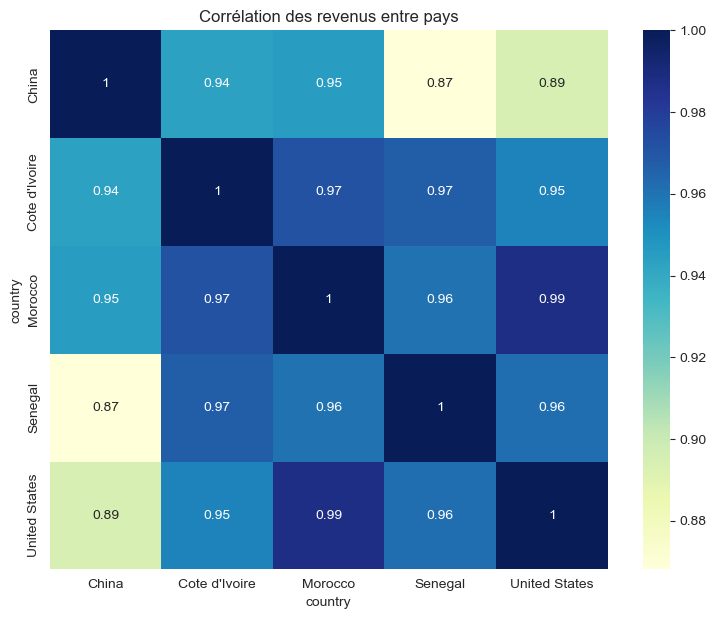

In [24]:
# affichage graphique des résultats de la corrélation
plt.figure(figsize=(9,7))
sns.heatmap(corr_pays, annot=True, cmap="YlGnBu")
plt.title("Corrélation des revenus entre pays")
plt.savefig("Corrélation.png")
plt.show()

In [25]:
# corrélation sur l'ensemble des pays
df_ens = df_long.pivot(index="année", columns="country", values="income")
corr_ens = df_ens.corr()
print(corr_ens)


country      Afghanistan   Albania   Algeria   Andorra    Angola  \
country                                                            
Afghanistan     1.000000  0.908299  0.863693  0.858201  0.903270   
Albania         0.908299  1.000000  0.901651  0.921626  0.932366   
Algeria         0.863693  0.901651  1.000000  0.985743  0.907872   
Andorra         0.858201  0.921626  0.985743  1.000000  0.928294   
Angola          0.903270  0.932366  0.907872  0.928294  1.000000   
...                  ...       ...       ...       ...       ...   
Venezuela       0.162125  0.059911  0.458258  0.413831  0.273509   
Vietnam         0.879104  0.985750  0.822951  0.847969  0.881190   
Yemen           0.535016  0.610384  0.852913  0.806432  0.656831   
Zambia          0.920880  0.964933  0.968467  0.981960  0.952270   
Zimbabwe        0.731138  0.837616  0.953781  0.946504  0.793875   

country      Antigua and Barbuda  Argentina   Armenia  Australia   Austria  \
country                              

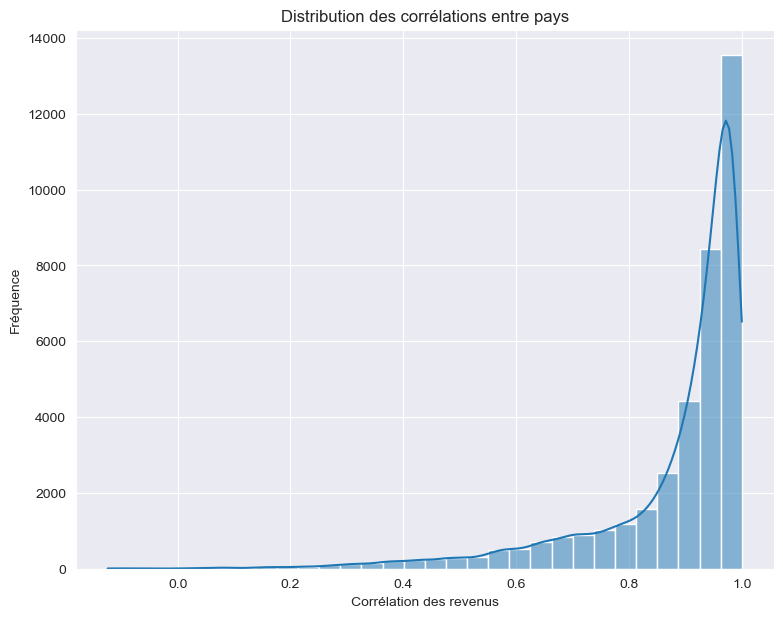

In [26]:
# Histogramme des corrélations entre pays
plt.figure(figsize=(9,7))
sns.histplot(corr_ens.values.flatten(), bins=30, kde=True)
plt.title('Distribution des corrélations entre pays')
plt.xlabel("Corrélation des revenus")
plt.ylabel("Fréquence")
plt.savefig("Distribution_corrélations.png")
plt.show()

In [57]:
X= [0, 0, 0, 0, 0, 2, 3, 4, 4, 5, 5, 7, 67]
data = pd.Series(X)
Moyenne = data.mean()
print(Moyenne)
Variance = data.var()
print(Variance)
mediane = data.median()
print(mediane)

7.461538461538462
325.7692307692308
3.0


In [27]:
# Calcul de quelques descripteurs
Moyenne = df_long['income'].mean()
print(f"Le revenu moyen par habitant est de {Moyenne:.0f} $.")
mediane = df_long['income'].median()
print(f"Le revenu médian par habitant est de {mediane:.0f} $.")
Variance = df_long['income'].var()
print(f"La variance est de {Variance:.0f} $.")
Ecart_type = df_long['income'].std()
print(f"L'écart_type est de {Ecart_type:.0f} $.")
Skewness = df_long["income"].skew()
print(f"Le Skewness est de {Skewness:.0f}$.")
Kurtosis = df_long["income"].kurtosis()
print(f"Le Kurtosis est de {Kurtosis:.0f} $.")

Le revenu moyen par habitant est de 7972 $.
Le revenu médian par habitant est de 1980 $.
La variance est de 269663770 $.
L'écart_type est de 16421 $.
Le Skewness est de 4$.
Le Kurtosis est de 26 $.


In [76]:
# Pour l'année 2022
Moyenne = df_long[df_long['année'] == 2022]['income'].mean()
Mediane = df_long[df_long["année"] == 2022]['income'].median()
print(f"Le revenu médian par habitant en 2022 est de {Mediane :.0f} $.")


Le revenu moyen par habitant en 2022 est 21009 $.
Le revenu médian par habitant en 2022 est de 13200 $.
